# Sócios da Educação

In [1]:
import os
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = "data"

EDU_COMPANIES_CNAES_FILE = os.path.join(DATA_DIR, "edu_empresas_cnaes.csv")
EDU_ACTIVE_PARTNERS_FILE = os.path.join(DATA_DIR, "edu_socios_ativos.csv")
# EDU_CNAES_FILE = os.path.join(DATA_DIR, "edu_cnaes.csv")

FUNDAMENTAL_CODE = '851'
MEDIO_CODE = '852'
SUPERIOR_CODE = '853'
TECNICO_CODE = '854'
APOIO_CODE = '855'
OUTRAS_CODE = '859'

CLASSES = [FUNDAMENTAL_CODE, MEDIO_CODE, SUPERIOR_CODE, TECNICO_CODE, APOIO_CODE, OUTRAS_CODE]

# COMPANIES_COLS = ['cnpj', 'matriz_filial', 'razao_social', 'nome_fantasia',
#        'situacao', 'data_situacao', 'motivo_situacao', 'cod_pais', 
#        'nome_pais', 'cod_nat_juridica', 'data_inicio_ativ', 'cnae_fiscal', 
#        'cep', 'uf', 'cod_municipio', 'municipio', 'qualif_resp', 'capital_social',
#        'porte', 'opc_simples', 'opc_mei', 'sit_especial']

COMPANIES_COLS = ['cnpj', 'matriz_filial', 'razao_social', 'nome_fantasia',
       'nome_pais', 'cod_nat_juridica', 'cnae_fiscal', 'uf', 
       'qualif_resp', 'capital_social', 'porte']

COMPANIES_COLS.extend(CLASSES)

ACTIVE_CODE = 2
INDIVIDUAL_ENTREPRENEUR_CODE = 2135

In [3]:
COMPANIES_PARTNERS_GRAPH = os.path.join(DATA_DIR, "grafo_empresas_socios.gexf")

CNPJ_CPF_SOCIO = 'cnpj_cpf_socio'
TIPO_SOCIO = 'tipo_socio'
NOME_SOCIO = 'nome_socio'
ID_SOCIO = 'id_socio'

CNPJ = 'cnpj'

PESSOA_JURIDICA = 1
PESSOA_FISICA = 2
ESTRANGEIRO = 3

SOCIO_DE = 'socio_de'
N_SOCIOS = 'n_socios'

In [4]:
df_full_partners = pd.read_csv(EDU_ACTIVE_PARTNERS_FILE, index_col=0)
df_full_partners.cnpj = df_full_partners.cnpj.astype(str)
df_full_partners.cnpj_cpf_socio = df_full_partners.cnpj_cpf_socio.astype(str)
df_full_partners[ID_SOCIO] = (df_full_partners.cnpj_cpf_socio + df_full_partners.apply(
                                lambda x: x.nome_socio if x.tipo_socio == PESSOA_FISICA else "", axis=1) 
                              )
df_full_partners

,cnpj,tipo_socio,nome_socio,cnpj_cpf_socio,cod_qualificacao,perc_capital,data_entrada,cod_pais_ext,nome_pais_ext,cpf_repres,nome_repres,cod_qualif_repres,id_socio
353801,14000105,2,ANTONIO OLIVEIRA DA SILVA,***439608**,16,0.0,20140714,249.0,ESTADOS UNIDOS,NaN,NaN,0,***439608**ANTONIO OLIVEIRA DA SILVA
353802,14000296,2,ANTONIO OLIVEIRA DA SILVA,***439608**,16,0.0,20140714,863.0,"VIRGENS, ILHAS (BRITANICAS)",NaN,NaN,0,***439608**ANTONIO OLIVEIRA DA SILVA
353803,14000377,2,ANTONIO OLIVEIRA DA SILVA,***439608**,16,0.0,20140714,573.0,Países Baixos (Holanda),NaN,NaN,0,***439608**ANTONIO OLIVEIRA DA SILVA
353812,28000129,2,CRISTIANO FERRAZ DE PAIVA,***135348**,22,0.0,20000111,249.0,ESTADOS UNIDOS,NaN,NaN,0,***135348**CRISTIANO FERRAZ DE PAIVA
353813,28000129,2,MAURICIO FERRAZ DE PAIVA,***695748**,49,0.0,20000111,249.0,ESTADOS UNIDOS,NaN,NaN,0,***695748**MAURICIO FERRAZ DE PAIVA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26188608,98675093000159,2,ARTHUR GRANDO,***606100**,16,0.0,20190125,275.0,FRANCA,NaN,NaN,0,***606100**ARTHUR GRANDO
26188754,98759046000193,2,LAUDIO ALBERTO BORBA,***307540**,16,0.0,20050422,863.0,"VIRGENS, ILHAS (BRITANICAS)",NaN,NaN,0,***307540**LAUDIO ALBERTO BORBA
26188756,98760572000173,2,VALDIR ANTONIO FORMENTINI,***665020**,16,0.0,20100730,573.0,Países Baixos (Holanda),NaN,NaN,0,***665020**VALDIR ANTONIO FORMENTINI
26188757,98760572000254,2,VALDIR ANTONIO FORMENTINI,***665020**,16,0.0,20100730,249.0,ESTADOS UNIDOS,NaN,NaN,0,***665020**VALDIR ANTONIO FORMENTINI


In [5]:
df_full_partners[ID_SOCIO].isna().sum()

0

In [6]:
df_full_partners.tipo_socio.value_counts()

2    734323
1     14194
3       111
Name: tipo_socio, dtype: int64

1 – PESSOA JURÍDICA

2 – PESSOA FISICA

3 – ESTRANGEIRO


In [7]:
df_full_partners[df_full_partners.tipo_socio == 3]

,cnpj,tipo_socio,nome_socio,cnpj_cpf_socio,cod_qualificacao,perc_capital,data_entrada,cod_pais_ext,nome_pais_ext,cpf_repres,nome_repres,cod_qualif_repres,id_socio
508190,239843000145,3,INTERGEST S/A FRANCE,99999999999,37,0.0,19940718,275.0,FRANCA,85904422849,NaN,17,99999999999
528852,272073000132,3,SGS GROUP MANAGEMENT S.A.,99999999999,37,0.0,20070105,767.0,SUICA,23277138895,NaN,17,99999999999
528876,272073000302,3,SGS GROUP MANAGEMENT S.A.,99999999999,37,0.0,20070105,767.0,SUICA,23277138895,NaN,17,99999999999
528912,272073000728,3,SGS GROUP MANAGEMENT S.A.,99999999999,37,0.0,20070105,767.0,SUICA,23277138895,NaN,17,99999999999
704539,385747000105,3,"FAGOR AUTOMATION,S.COOP.LT",99999999999,37,0.0,19941223,245.0,ESPANHA,53067525868,NaN,17,99999999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24178544,62463823000100,3,AIC INVESTMENT COMPANY,99999999999,37,0.0,19690606,863.0,"VIRGENS, ILHAS (BRITANICAS)",46904298804,NaN,17,99999999999
24454703,67818385000170,3,CONSTANCE SUSAN FOLEY,99999999999,38,0.0,19920413,249.0,ESTADOS UNIDOS,37560379753,NaN,17,99999999999
24454705,67818385000170,3,THOMAS DAVID FOLEY,99999999999,38,0.0,19920413,249.0,ESTADOS UNIDOS,37560379753,NaN,17,99999999999
24545298,69102440000156,3,TOWER FINANCIAL SERVICES LTD,99999999999,37,0.0,19931019,863.0,"VIRGENS, ILHAS (BRITANICAS)",59708085804,NaN,17,99999999999


In [8]:
df_partners = df_full_partners.copy()
df_partners = df_partners.loc[:,[CNPJ, ID_SOCIO, CNPJ_CPF_SOCIO, NOME_SOCIO, TIPO_SOCIO]]
df_partners

,cnpj,id_socio,cnpj_cpf_socio,nome_socio,tipo_socio
353801,14000105,***439608**ANTONIO OLIVEIRA DA SILVA,***439608**,ANTONIO OLIVEIRA DA SILVA,2
353802,14000296,***439608**ANTONIO OLIVEIRA DA SILVA,***439608**,ANTONIO OLIVEIRA DA SILVA,2
353803,14000377,***439608**ANTONIO OLIVEIRA DA SILVA,***439608**,ANTONIO OLIVEIRA DA SILVA,2
353812,28000129,***135348**CRISTIANO FERRAZ DE PAIVA,***135348**,CRISTIANO FERRAZ DE PAIVA,2
353813,28000129,***695748**MAURICIO FERRAZ DE PAIVA,***695748**,MAURICIO FERRAZ DE PAIVA,2
...,...,...,...,...,...
26188608,98675093000159,***606100**ARTHUR GRANDO,***606100**,ARTHUR GRANDO,2
26188754,98759046000193,***307540**LAUDIO ALBERTO BORBA,***307540**,LAUDIO ALBERTO BORBA,2
26188756,98760572000173,***665020**VALDIR ANTONIO FORMENTINI,***665020**,VALDIR ANTONIO FORMENTINI,2
26188757,98760572000254,***665020**VALDIR ANTONIO FORMENTINI,***665020**,VALDIR ANTONIO FORMENTINI,2


In [9]:
df_companies = pd.read_csv(EDU_COMPANIES_CNAES_FILE, usecols=COMPANIES_COLS)
df_companies.cnpj = df_companies.cnpj.astype(str)
df_companies

/Users/hallpaz/Workspace/python/who-owns-brazilian-education/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cnpj,matriz_filial,razao_social,nome_fantasia,nome_pais,cod_nat_juridica,cnae_fiscal,uf,qualif_resp,capital_social,porte,851,852,853,854,855,859
0,39000109,1,MISSAO RAMA DO BRASIL,NaN,NaN,3999,8520100,SP,16,0.0,5,0,1,0,0,0,0
1,52000168,1,RECREACAO ESCOLA INFANTIL TREVINHO VERDE S/C LTDA,NaN,NaN,2240,8512100,SP,28,0.0,5,1,0,0,0,0,0
2,62000101,1,CENTRO DE RECREACAO INFANTIL GRILINHO S/C.LTDA.,NaN,NaN,2240,8512100,SP,28,0.0,5,1,0,0,0,0,0
3,66000181,1,ASSOCIACAO BENEFICENTE LUZ DE UM NOVO DIA,NaN,NaN,3999,8511200,SP,16,0.0,5,3,0,0,0,0,0
4,104000287,2,INSTITUTO GRANDE VITORIA,C.E.I. ''GRANDE VITORIA'' - UNIDADE 1,NaN,3999,8511200,SP,16,0.0,5,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502159,98042120000156,1,COOPERATIVA AGRO-PECUARIA ALTO URUGUAI LTDA EM...,COTRIMAIO,NaN,2143,4789099,RS,13,0.0,5,0,0,0,0,0,1
1502160,98759046000193,1,SOCIEDADE ESPIRITA SIMAO PEDRO,NaN,NaN,3999,9491000,RS,16,0.0,5,0,0,0,0,0,1
1502161,98760572000173,1,ASSISTENCIA SOCIAL SANTA ISABEL,NaN,NaN,3999,8800600,RS,16,0.0,5,0,0,0,0,0,1
1502162,98760572000254,2,ASSISTENCIA SOCIAL SANTA ISABEL,NaN,NaN,3999,8800600,RS,16,0.0,5,0,0,0,0,0,1


In [10]:
df_partners = df_partners.merge(
    df_companies[[CNPJ, 'razao_social', 'matriz_filial', 'capital_social']], how='left', on=CNPJ
)

df_partners = df_partners[
    [CNPJ, 'razao_social', 'matriz_filial', 'capital_social', CNPJ_CPF_SOCIO, ID_SOCIO, NOME_SOCIO, TIPO_SOCIO]
]
df_partners

,cnpj,razao_social,matriz_filial,capital_social,cnpj_cpf_socio,id_socio,nome_socio,tipo_socio
0,14000105,CLUBE DE MAES DA CASA VERDE ALTA E ADJACENCIAS,1,0.0,***439608**,***439608**ANTONIO OLIVEIRA DA SILVA,ANTONIO OLIVEIRA DA SILVA,2
1,14000296,CLUBE DE MAES DA CASA VERDE ALTA E ADJACENCIAS,2,0.0,***439608**,***439608**ANTONIO OLIVEIRA DA SILVA,ANTONIO OLIVEIRA DA SILVA,2
2,14000377,CLUBE DE MAES DA CASA VERDE ALTA E ADJACENCIAS,2,0.0,***439608**,***439608**ANTONIO OLIVEIRA DA SILVA,ANTONIO OLIVEIRA DA SILVA,2
3,28000129,TARGET ENGENHARIA E CONSULTORIA LTDA.,1,45000000.0,***135348**,***135348**CRISTIANO FERRAZ DE PAIVA,CRISTIANO FERRAZ DE PAIVA,2
4,28000129,TARGET ENGENHARIA E CONSULTORIA LTDA.,1,45000000.0,***695748**,***695748**MAURICIO FERRAZ DE PAIVA,MAURICIO FERRAZ DE PAIVA,2
...,...,...,...,...,...,...,...,...
748623,98675093000159,CENTRO COMUNITARIO VERANENSE DE EDUCACAO E ASS...,1,0.0,***606100**,***606100**ARTHUR GRANDO,ARTHUR GRANDO,2
748624,98759046000193,SOCIEDADE ESPIRITA SIMAO PEDRO,1,0.0,***307540**,***307540**LAUDIO ALBERTO BORBA,LAUDIO ALBERTO BORBA,2
748625,98760572000173,ASSISTENCIA SOCIAL SANTA ISABEL,1,0.0,***665020**,***665020**VALDIR ANTONIO FORMENTINI,VALDIR ANTONIO FORMENTINI,2
748626,98760572000254,ASSISTENCIA SOCIAL SANTA ISABEL,2,0.0,***665020**,***665020**VALDIR ANTONIO FORMENTINI,VALDIR ANTONIO FORMENTINI,2


## Quantas Empresas são sócias de empresas com atividade em Educação?

In [11]:
df_companies_partners = df_partners[df_partners.tipo_socio == PESSOA_JURIDICA] 
len(df_companies_partners[ID_SOCIO].unique())

6394

## Quantas dessas empresas declaram atividade econômica em Educação?

In [12]:
df_double_agent = df_companies_partners[df_companies_partners.id_socio.isin(df_partners.cnpj)]
print(len(df_double_agent.cnpj.unique()), "empresas na área")
df_double_agent

1710 empresas na área


,cnpj,razao_social,matriz_filial,capital_social,cnpj_cpf_socio,id_socio,nome_socio,tipo_socio
688,78220000138,CENTRO DE ENSINO UNIFICADO DO DISTRITO FEDERAL...,1,1.209200e+09,62984091000102,62984091000102,CRUZEIRO DO SUL EDUCACIONAL S.A.,1
691,78220000219,CENTRO DE ENSINO UNIFICADO DO DISTRITO FEDERAL...,2,0.000000e+00,62984091000102,62984091000102,CRUZEIRO DO SUL EDUCACIONAL S.A.,1
1275,111296000118,COLEGIO VIDA LTDA,1,1.628800e+07,56012628000161,56012628000161,SEB SISTEMA EDUCACIONAL BRASILEIRO S.A.,1
2421,198869000192,BMI TREINAMENTO E CONSULTORIA LTDA.,1,2.000000e+05,28034898000138,28034898000138,WF ASSOCIADOS EM CONSULTORIA EMPRESARIAL LTDA.,1
2422,198869000192,BMI TREINAMENTO E CONSULTORIA LTDA.,1,2.000000e+05,27647918000183,27647918000183,WF NEXIALISTAS EDUCACAO CORPORATIVA S.A.,1
...,...,...,...,...,...,...,...,...
745893,93508141000362,CLINICA MEDICA DR NILO FRANTZ LTDA,2,0.000000e+00,93508141000109,93508141000109,CLINICA MEDICA DR NILO FRANTZ LTDA,1
746550,94823408000107,CTZ CONSULTORIA E INFORMATICA LTDA,1,3.500000e+07,94823408000107,94823408000107,CTZ CONSULTORIA E INFORMATICA LTDA,1
746964,96318142001738,LIVRARIA LIVRO FACIL LTDA,2,0.000000e+00,61259958000196,61259958000196,EDITORA ATICA S.A.,1
746966,96318142001819,LIVRARIA LIVRO FACIL LTDA,2,0.000000e+00,61259958000196,61259958000196,EDITORA ATICA S.A.,1


## Criação do Grafo de Relacionamento "É sócio de" entre CPF-CNPJ e CPNJ

In [13]:
# DIRECTED GRAPH
G_cp = nx.from_pandas_edgelist(df_partners, ID_SOCIO, CNPJ, create_using=nx.DiGraph)

In [14]:
nx.number_of_selfloops(G_cp)

150

In [15]:
# drop self loop edges from dataframe
df_partners.drop(df_partners[df_partners.cnpj == df_partners.id_socio].index, inplace=True)

In [16]:
G_cp.remove_edges_from(nx.selfloop_edges(G_cp))
nx.set_node_attributes(G_cp, dict(zip(df_partners.id_socio, df_partners.tipo_socio)), TIPO_SOCIO)

In [17]:
print(nx.info(G_cp))

Name: 
Type: DiGraph
Number of nodes: 960599
Number of edges: 748450
Average in degree:   0.7791
Average out degree:   0.7791


In [18]:
# No isolated nodes (by construction)
len(list(nx.isolates(G_cp)))

0

In [19]:
bipartite.is_bipartite(G_cp)

False

In [20]:
companies = []
part_companies = []
part_people = []
part_foreigners = []
for node in G_cp.nodes:
    if TIPO_SOCIO in G_cp.nodes[node]:
        if G_cp.nodes[node][TIPO_SOCIO] == PESSOA_FISICA:
            part_people.append(node)
        elif G_cp.nodes[node][TIPO_SOCIO] == ESTRANGEIRO:
            part_foreigners.append(node)
        else:
            part_companies.append(node)
    else:
        companies.append(node)
print("{} + {} + {} + {} = {}".format(
    len(companies), len(part_companies), len(part_people), len(part_foreigners),
    len(companies) + len(part_companies) + len(part_people) + len(part_foreigners)
))

366735 + 6268 + 587595 + 1 = 960599


In [21]:
intermediary_companies = []
for n in G_cp.nodes:
    if (G_cp.in_degree(n) > 0) and (G_cp.out_degree(n) > 0):
        intermediary_companies.append(n)
# validation
for n in intermediary_companies:
    if G_cp.nodes[n][TIPO_SOCIO] != PESSOA_JURIDICA:
        print("NOT COMPANY", n, G_cp.nodes[n][TIPO_SOCIO])
        break
    if n.startswith("*"):
        print("ID as PERSON", n, G_cp.nodes[n][TIPO_SOCIO])
        break
len(intermediary_companies)

592

In [22]:
potential_holdings = []
for n in G_cp.nodes:
    if (G_cp.in_degree(n) == 0) and (G_cp.out_degree(n) > 0):
        if G_cp.nodes[n][TIPO_SOCIO] != PESSOA_FISICA:
            potential_holdings.append(n)
# validation
for n in potential_holdings:
    if G_cp.nodes[n][TIPO_SOCIO] == ESTRANGEIRO:
        print("FOREIGNER FOUND", n, G_cp.nodes[n][TIPO_SOCIO])
        continue
    if G_cp.nodes[n][TIPO_SOCIO] != PESSOA_JURIDICA:
        print("NOT COMPANY", n, G_cp.nodes[n][TIPO_SOCIO])
        break
    if n.startswith("*"):
        print("ID as PERSON", n, G_cp.nodes[n][TIPO_SOCIO])
        break
len(potential_holdings)

FOREIGNER FOUND 99999999999 3


5677

### Há 6268 empresas que são sócias de empresas com atividade em Educação. Destas, 5676 não possuem dados dos sócios no nosso recorte da base de dados (várias são estrangeiras, mas não possuem este campo ativado). 

### Os sócios declarados como "Estrangeiros" na base de dados foram condensados em uma representação única.

### 592 empresas que são sócias de outras empresas têm (ao menos parte de) seus sócios representados no grafo. Vamos Substituir essas empresas pelos sócios.

# Exporta o Grafo para um arquivo

In [23]:
nx.write_gexf(G_cp, COMPANIES_PARTNERS_GRAPH)

# Exporta o dataframe de trabalho para CSV

In [24]:
COMPANIES_PARTNERS_SMALL_DATA = os.path.join(DATA_DIR, "edu_small_empresas_socios.csv")
df_partners.to_csv(COMPANIES_PARTNERS_SMALL_DATA, mode='w', header= True, index=False)

----

# => Análises do GRAFO

## Quem são os sócios de mais empresas com atividades declaradas em Educação?

In [25]:
out_degrees = [(n, G_cp.out_degree(n)) for n in G_cp.nodes]
print("Total de nós:", len(out_degrees)) #must be the number of nodes 960599
out_degrees = [d for d in out_degrees if d[1] > 0]
print("Total de sócios:", len(out_degrees)) #must be the number of partners 593864

Total de nós: 960599
Total de sócios: 593864


In [26]:
sorted(out_degrees, key=lambda x: x[1], reverse=True)[0:10]

[('***616878**CARLOS ALBERTO BOLINA LAZAR', 683),
 ('***436968**ROBERTO AFONSO VALERIO NETO', 675),
 ('***225868**MARIO GHIO JUNIOR', 673),
 ('***153291**RODRIGO CALVO GALINDO', 566),
 ('***824308**JOAO CARLOS DI GENIO', 367),
 ('***109868**JORGE BRIHY', 327),
 ('***179838**FERNANDO DI GENIO BARBOSA', 312),
 ('38733648000140', 290),
 ('***031488**JOSE FERNANDO PINTO DA COSTA', 265),
 ('***815748**ANA IDA DI GENIO BARBOSA', 260)]

### Vamos decifrar esses números  em uma tabela

In [26]:
df_out = pd.DataFrame(out_degrees, columns=[ID_SOCIO, SOCIO_DE])
df_out = df_out.merge(
    df_partners[[ID_SOCIO, NOME_SOCIO]].groupby(ID_SOCIO).max(), how='left', on=ID_SOCIO
)
print(df_out.shape)

(593864, 3)


In [27]:
df_out.sort_values(by=[SOCIO_DE, NOME_SOCIO], ascending=False).head(20)

,id_socio,socio_de,nome_socio
8230,***616878**CARLOS ALBERTO BOLINA LAZAR,683,CARLOS ALBERTO BOLINA LAZAR
8231,***436968**ROBERTO AFONSO VALERIO NETO,675,ROBERTO AFONSO VALERIO NETO
8229,***225868**MARIO GHIO JUNIOR,673,MARIO GHIO JUNIOR
15754,***153291**RODRIGO CALVO GALINDO,566,RODRIGO CALVO GALINDO
1094,***824308**JOAO CARLOS DI GENIO,367,JOAO CARLOS DI GENIO
1092,***109868**JORGE BRIHY,327,JORGE BRIHY
23427,***179838**FERNANDO DI GENIO BARBOSA,312,FERNANDO DI GENIO BARBOSA
15755,38733648000140,290,EDITORA E DISTRIBUIDORA EDUCACIONAL S/A
14616,***031488**JOSE FERNANDO PINTO DA COSTA,265,JOSE FERNANDO PINTO DA COSTA
23426,***815748**ANA IDA DI GENIO BARBOSA,260,ANA IDA DI GENIO BARBOSA


In [101]:
in_degrees = [(n, G_cp.in_degree(n)) for n in G_cp.nodes]
print("Total de nós:", len(in_degrees)) #must be the number of nodes 960599
in_degrees = [d for d in in_degrees if d[1] > 0]
print("Total de SOCIEDADES (apenas):", len(in_degrees)) #must be the number of partners 593864

Total de nós: 960599
Total de SOCIEDADES (apenas): 367327


In [102]:
sorted(in_degrees, key=lambda x: x[1], reverse=True)[0:10]

[('59527788000131', 342),
 ('59527788000212', 342),
 ('59527788000484', 342),
 ('59527788000565', 342),
 ('59527788000646', 342),
 ('59527788001103', 342),
 ('59527788001456', 342),
 ('59527788001537', 342),
 ('59527788001880', 342),
 ('3570722000170', 300)]

### Vamos decifrar esses números  em uma tabela

In [112]:
df_in = pd.DataFrame(in_degrees, columns=[CNPJ, N_SOCIOS])
df_in = df_in.merge(
    df_partners[[CNPJ, 'razao_social']].groupby(CNPJ).max(), how='left', on=CNPJ
)
print(df_in.shape)

(367327, 3)


In [113]:
df_in.sort_values(by=[N_SOCIOS, 'razao_social'], ascending=False).head(20)

,cnpj,n_socios,razao_social
352885,59527788000131,342,ERNST & YOUNG ASSESSORIA EMPRESARIAL LTDA
352886,59527788000212,342,ERNST & YOUNG ASSESSORIA EMPRESARIAL LTDA
352887,59527788000484,342,ERNST & YOUNG ASSESSORIA EMPRESARIAL LTDA
352888,59527788000565,342,ERNST & YOUNG ASSESSORIA EMPRESARIAL LTDA
352889,59527788000646,342,ERNST & YOUNG ASSESSORIA EMPRESARIAL LTDA
352890,59527788001103,342,ERNST & YOUNG ASSESSORIA EMPRESARIAL LTDA
352891,59527788001456,342,ERNST & YOUNG ASSESSORIA EMPRESARIAL LTDA
352892,59527788001537,342,ERNST & YOUNG ASSESSORIA EMPRESARIAL LTDA
352893,59527788001880,342,ERNST & YOUNG ASSESSORIA EMPRESARIAL LTDA
37349,3570722000170,300,PROMED - SERVICOS EM SAUDE LTDA


----

## Vamos substituir empresas que são sócias pelos seus respectivos sócios

In [28]:
import itertools

In [29]:
G_af = nx.read_gexf(COMPANIES_PARTNERS_GRAPH)

In [30]:
print(nx.info(G_af))
print("Nós isolados: {}\nÉ bipartido: {}".format(list(nx.isolates(G_af)), bipartite.is_bipartite(G_af)))
print("Número de arestas de um nó para si mesmo: {}".format(nx.number_of_selfloops(G_af)))

Name: 
Type: DiGraph
Number of nodes: 960599
Number of edges: 748450
Average in degree:   0.7791
Average out degree:   0.7791
Nós isolados: []
É bipartido: False
Número de arestas de um nó para si mesmo: 0


In [31]:
intermediary = []
for n in G_af.nodes:
    if (G_af.in_degree(n) > 0) and (G_af.out_degree(n) > 0):
        intermediary.append(n)
#len(intermediary)
while intermediary:
    to_be_removed = []
    to_be_added = []
    for n in intermediary:
        predecessors = G_af.predecessors(n)
        successors = G_af.successors(n)
        new_edges = itertools.product(list(predecessors), list(successors))#[(p, s) for p in predecessors for s in successors]
        if not new_edges:
            print("NO EDGES CREATED!", n, G_af.nodes[n])
            break
        to_be_removed.append(n)
        to_be_added.extend(new_edges)

    G_af.remove_nodes_from(to_be_removed)
    print("Removidos {} nós".format(len(to_be_removed)))
    G_af.add_edges_from(to_be_added)
    print("Adicionadas {} arestas".format(len(to_be_added)))
    G_af.remove_edges_from(nx.selfloop_edges(G_af))
    intermediary = []
    for n in G_af.nodes:
        if (G_af.in_degree(n) > 0) and (G_af.out_degree(n) > 0):
            intermediary.append(n)

Removidos 592 nós
Adicionadas 6977 arestas
Removidos 6 nós
Adicionadas 37 arestas


In [32]:
print(nx.info(G_af))

Name: 
Type: DiGraph
Number of nodes: 960072
Number of edges: 747675
Average in degree:   0.7788
Average out degree:   0.7788


In [33]:
print("Nós isolados: {}\nÉ bipartido: {}".format(list(nx.isolates(G_af)), bipartite.is_bipartite(G_af)))

Nós isolados: []
É bipartido: True


In [34]:
out_degrees = [(n, G_af.out_degree(n)) for n in G_af.nodes]
print("Total de nós:", len(out_degrees))
out_degrees = [d for d in out_degrees if d[1] > 0]
print("Total de sócios:", len(out_degrees)) 

Total de nós: 960072
Total de sócios: 593301


In [40]:
df_out = pd.DataFrame(out_degrees, columns=[ID_SOCIO, SOCIO_DE])

In [41]:
df_out = df_out.merge(
    df_partners[[ID_SOCIO, NOME_SOCIO]].groupby(ID_SOCIO).max(), how='left', on=ID_SOCIO
)
print(df_out.shape)

(593301, 3)


In [42]:
df_out.sort_values(by=[SOCIO_DE, NOME_SOCIO], ascending=False).head(20)

,id_socio,socio_de,nome_socio
8219,***616878**CARLOS ALBERTO BOLINA LAZAR,681,CARLOS ALBERTO BOLINA LAZAR
8220,***436968**ROBERTO AFONSO VALERIO NETO,676,ROBERTO AFONSO VALERIO NETO
8218,***225868**MARIO GHIO JUNIOR,676,MARIO GHIO JUNIOR
15732,***153291**RODRIGO CALVO GALINDO,574,RODRIGO CALVO GALINDO
1092,***824308**JOAO CARLOS DI GENIO,366,JOAO CARLOS DI GENIO
1090,***109868**JORGE BRIHY,327,JORGE BRIHY
23398,***179838**FERNANDO DI GENIO BARBOSA,309,FERNANDO DI GENIO BARBOSA
14595,***031488**JOSE FERNANDO PINTO DA COSTA,265,JOSE FERNANDO PINTO DA COSTA
23397,***815748**ANA IDA DI GENIO BARBOSA,260,ANA IDA DI GENIO BARBOSA
53152,***680604**JOAO ALBERICO PORTO DE AGUIAR,226,JOAO ALBERICO PORTO DE AGUIAR


In [ ]:
8230	***616878**CARLOS ALBERTO BOLINA LAZAR	683	CARLOS ALBERTO BOLINA LAZAR
8231	***436968**ROBERTO AFONSO VALERIO NETO	675	ROBERTO AFONSO VALERIO NETO
8229	***225868**MARIO GHIO JUNIOR	673	MARIO GHIO JUNIOR
15754	***153291**RODRIGO CALVO GALINDO	566	RODRIGO CALVO GALINDO
1094	***824308**JOAO CARLOS DI GENIO	367	JOAO CARLOS DI GENIO
1092	***109868**JORGE BRIHY	327	JORGE BRIHY
23427	***179838**FERNANDO DI GENIO BARBOSA	312	FERNANDO DI GENIO BARBOSA
15755	38733648000140	290	EDITORA E DISTRIBUIDORA EDUCACIONAL S/A
14616	***031488**JOSE FERNANDO PINTO DA COSTA	265	JOSE FERNANDO PINTO DA COSTA
23426	***815748**ANA IDA DI GENIO BARBOSA	260	ANA IDA DI GENIO BARBOSA
53194	***680604**JOAO ALBERICO PORTO DE AGUIAR	226	JOAO ALBERICO PORTO DE AGUIAR
53196	***249275**ADRIANO LISBOA DE AZEVEDO	226	ADRIANO LISBOA DE AZEVEDO
325475	***281646**NATALINO LISBOA FILHO	211	NATALINO LISBOA FILHO
325474	***340886**MATHEUS DE CASTRO LISBOA	211	MATHEUS DE CASTRO LISBOA
15753	04310392000146	183	ANHANGUERA EDUCACIONAL PARTICIPACOES S/A
550545	***601807**SERGIO FELTRIN CORREA	181	SERGIO FELTRIN CORREA
550543	***092764**ROGERIO AUTO TEOFILO	181	ROGERIO AUTO TEOFILO
550544	***452885**JOSE LIMA SANTANA	181	JOSE LIMA SANTANA
550547	***685787**ERNANI SOARES MAIA	181	ERNANI SOARES MAIA
550546	***493721**EDINALVO DANTAS	181	EDINALVO DANTAS


## Agora que temos um grafo bipartido, vamos separar os nós que são SÓCIOS, dos que são apenas SOCIEDADE

In [43]:
partners = [n for n in G_af.nodes if TIPO_SOCIO in G_af.nodes[n]]
companies = [n for n in G_af.nodes if not (TIPO_SOCIO in G_af.nodes[n])]
print("{} SÓCIOS e {} NÃO SÓCIOS".format(len(partners), len(companies)))

593272 SÓCIOS e 366800 NÃO SÓCIOS


In [44]:
G_undir = G_af.to_undirected()

In [45]:
G_part = bipartite.weighted_projected_graph(G_undir, partners)
G_comp = bipartite.weighted_projected_graph(G_undir, companies)

In [46]:
print(nx.info(G_part))
print(nx.info(G_comp))

Name: 
Type: Graph
Number of nodes: 593301
Number of edges: 915033
Average degree:   3.0845
Name: 
Type: Graph
Number of nodes: 366993
Number of edges: 773965
Average degree:   4.2179


## => Análise dos SÓCIOS

In [49]:
sole_partners = list(nx.isolates(G_part))
print("Sócio isolados: {}".format(len(sole_partners)))

Sócio isolados: 101309


In [51]:
# Remove isolates
G_part.remove_nodes_from(sole_partners)
print(nx.info(G_part))

Name: 
Type: Graph
Number of nodes: 491992
Number of edges: 915033
Average degree:   3.7197


In [52]:
sole_companies = list(nx.isolates(G_comp))
print("Empresas que não compartilham sócios com ninguém: {}".format(len(sole_companies)))

Empresas que não compartilham sócios com ninguém: 257576


In [53]:
# Remove isolates
G_comp.remove_nodes_from(sole_companies)
print(nx.info(G_comp))

Name: 
Type: Graph
Number of nodes: 109417
Number of edges: 773965
Average degree:  14.1471


In [54]:
graphs = {
    "Partners": G_part,
    "Companies": G_comp
}

In [57]:
print('   | Avg Clust.')
for key, G in graphs.items():
#     print(f'{key} | {nx.average_clustering(G):.4f} | {nx.average_shortest_path_length(G):.4f}')
    print(f'{key} | {nx.average_clustering(G):.4f}')

   | Avg Clust.
Partners | 0.3306
Companies | 0.4741


In [77]:
p_components = nx.connected_components(G_part)

In [73]:
len_components = [len(c) for c in sorted(nx.connected_components(G_part), key=len, reverse=True)]

In [74]:
print(len(len_components))

191867


In [75]:
len_components[0:20]

[4658,
 873,
 666,
 651,
 413,
 353,
 266,
 241,
 196,
 192,
 182,
 161,
 145,
 132,
 129,
 128,
 113,
 113,
 107,
 105]

In [78]:
p_largest_cc = max(p_components, key=len)

In [84]:
LC_part = G_part.subgraph(p_largest_cc).copy()

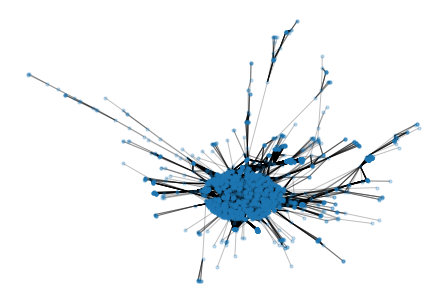

In [85]:
plt.figure(figsize=(20,30))
nx.draw(LC_part, alpha=0.25, node_size=5)

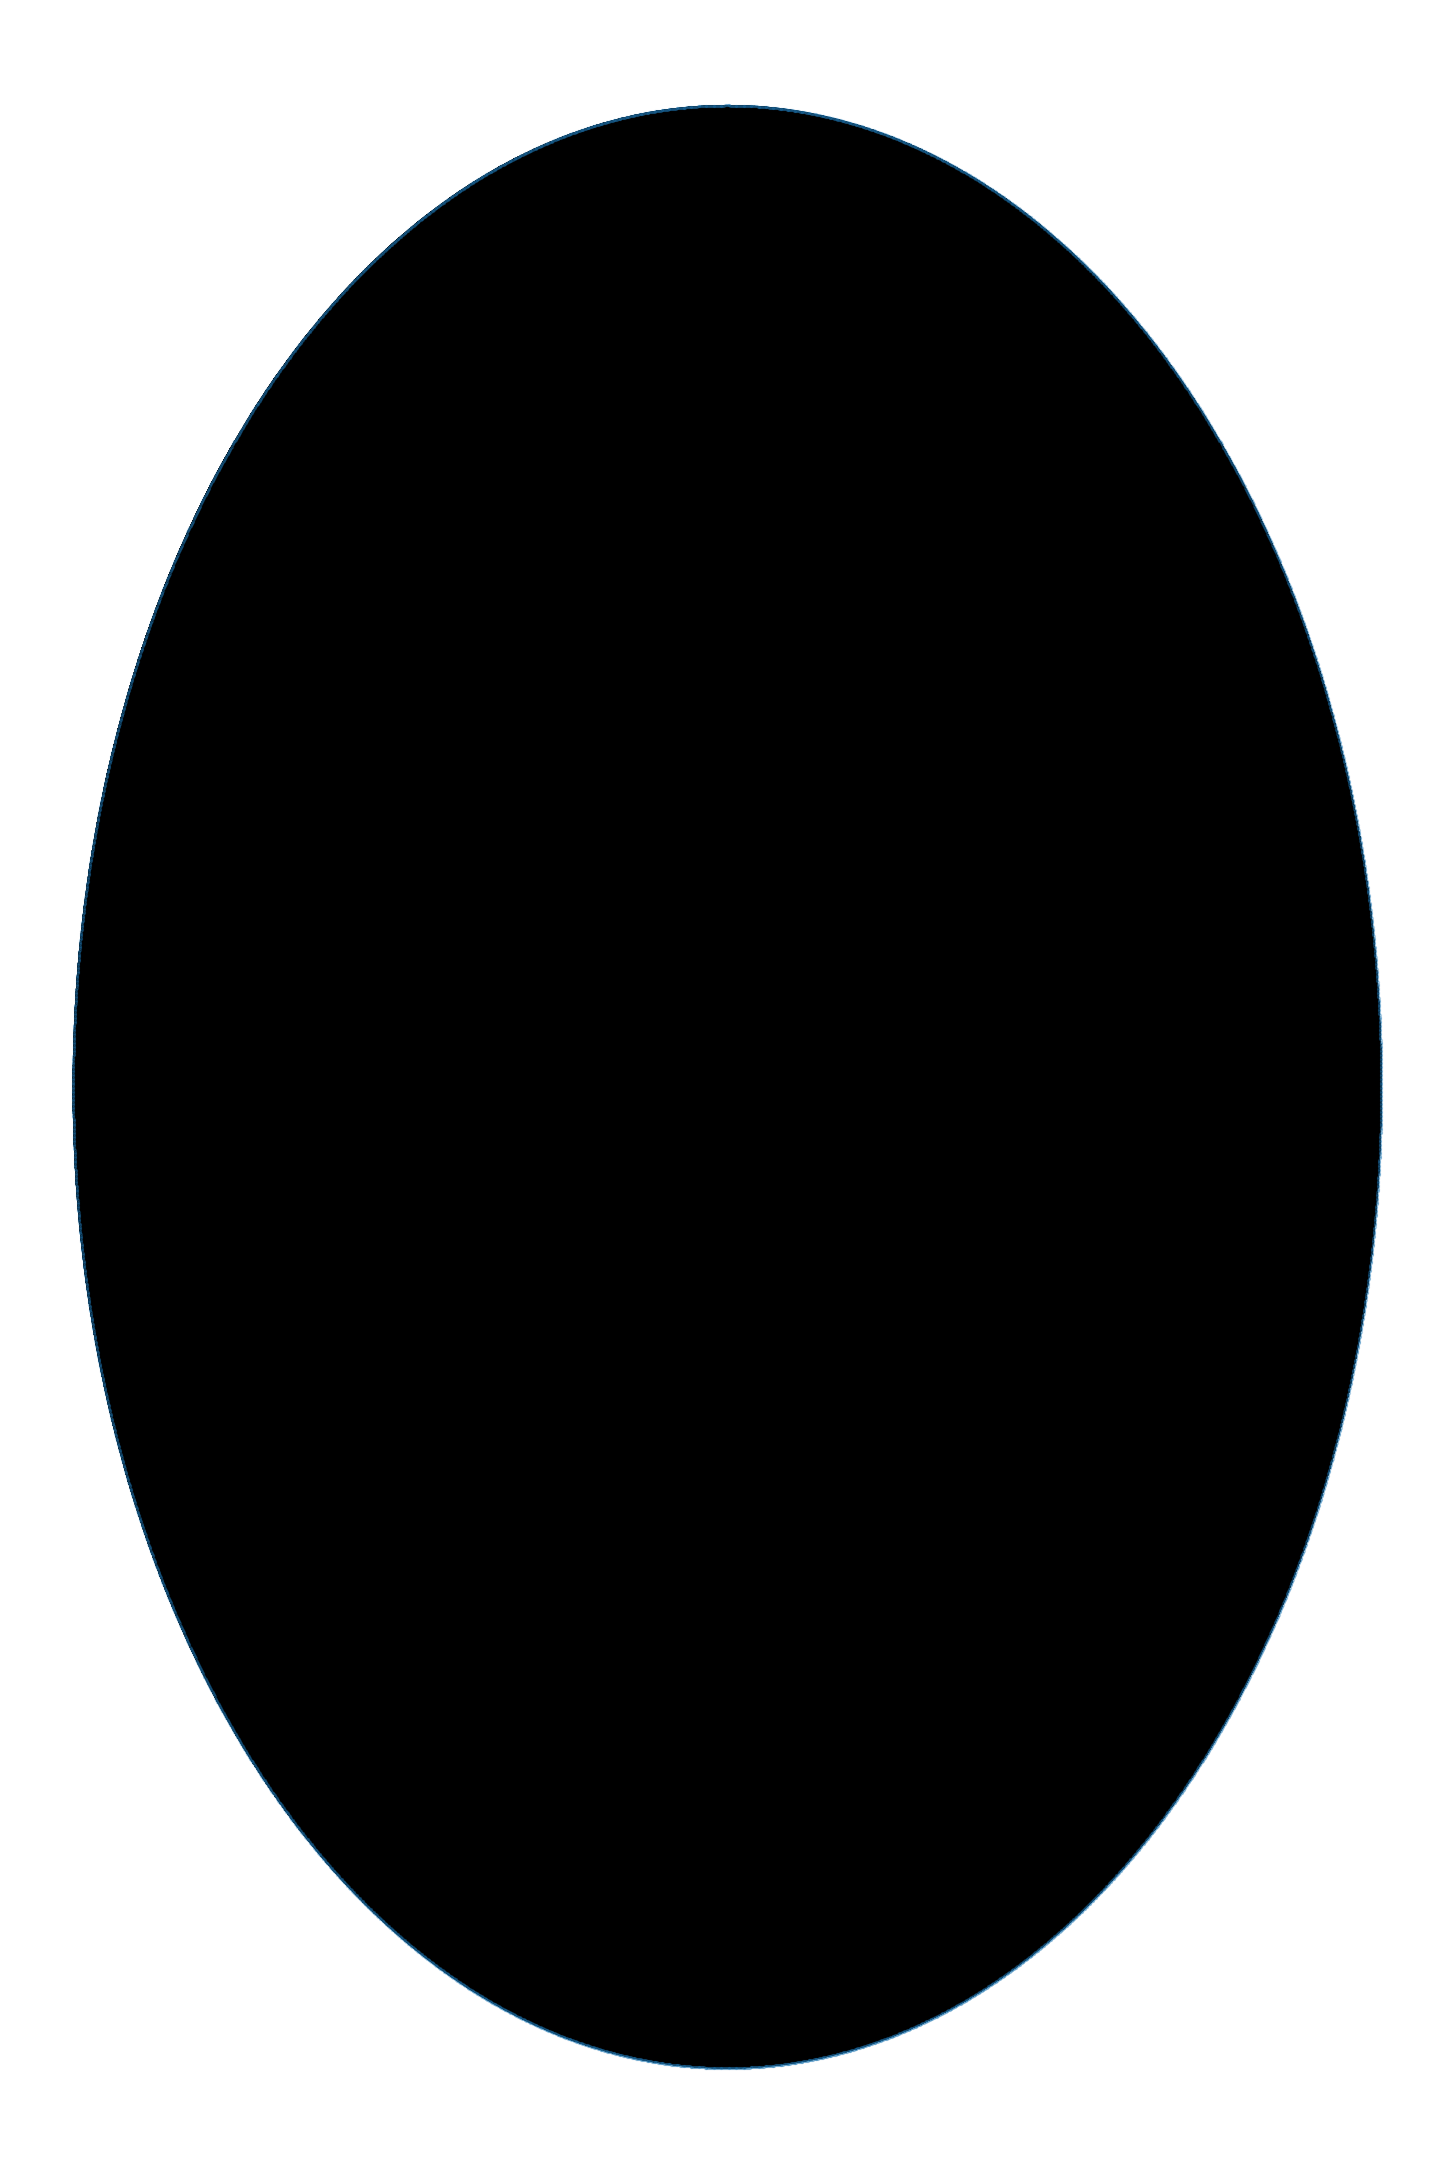

In [89]:
plt.figure(figsize=(20,30))
nx.draw_circular(LC_part, alpha=0.25, node_size=5)

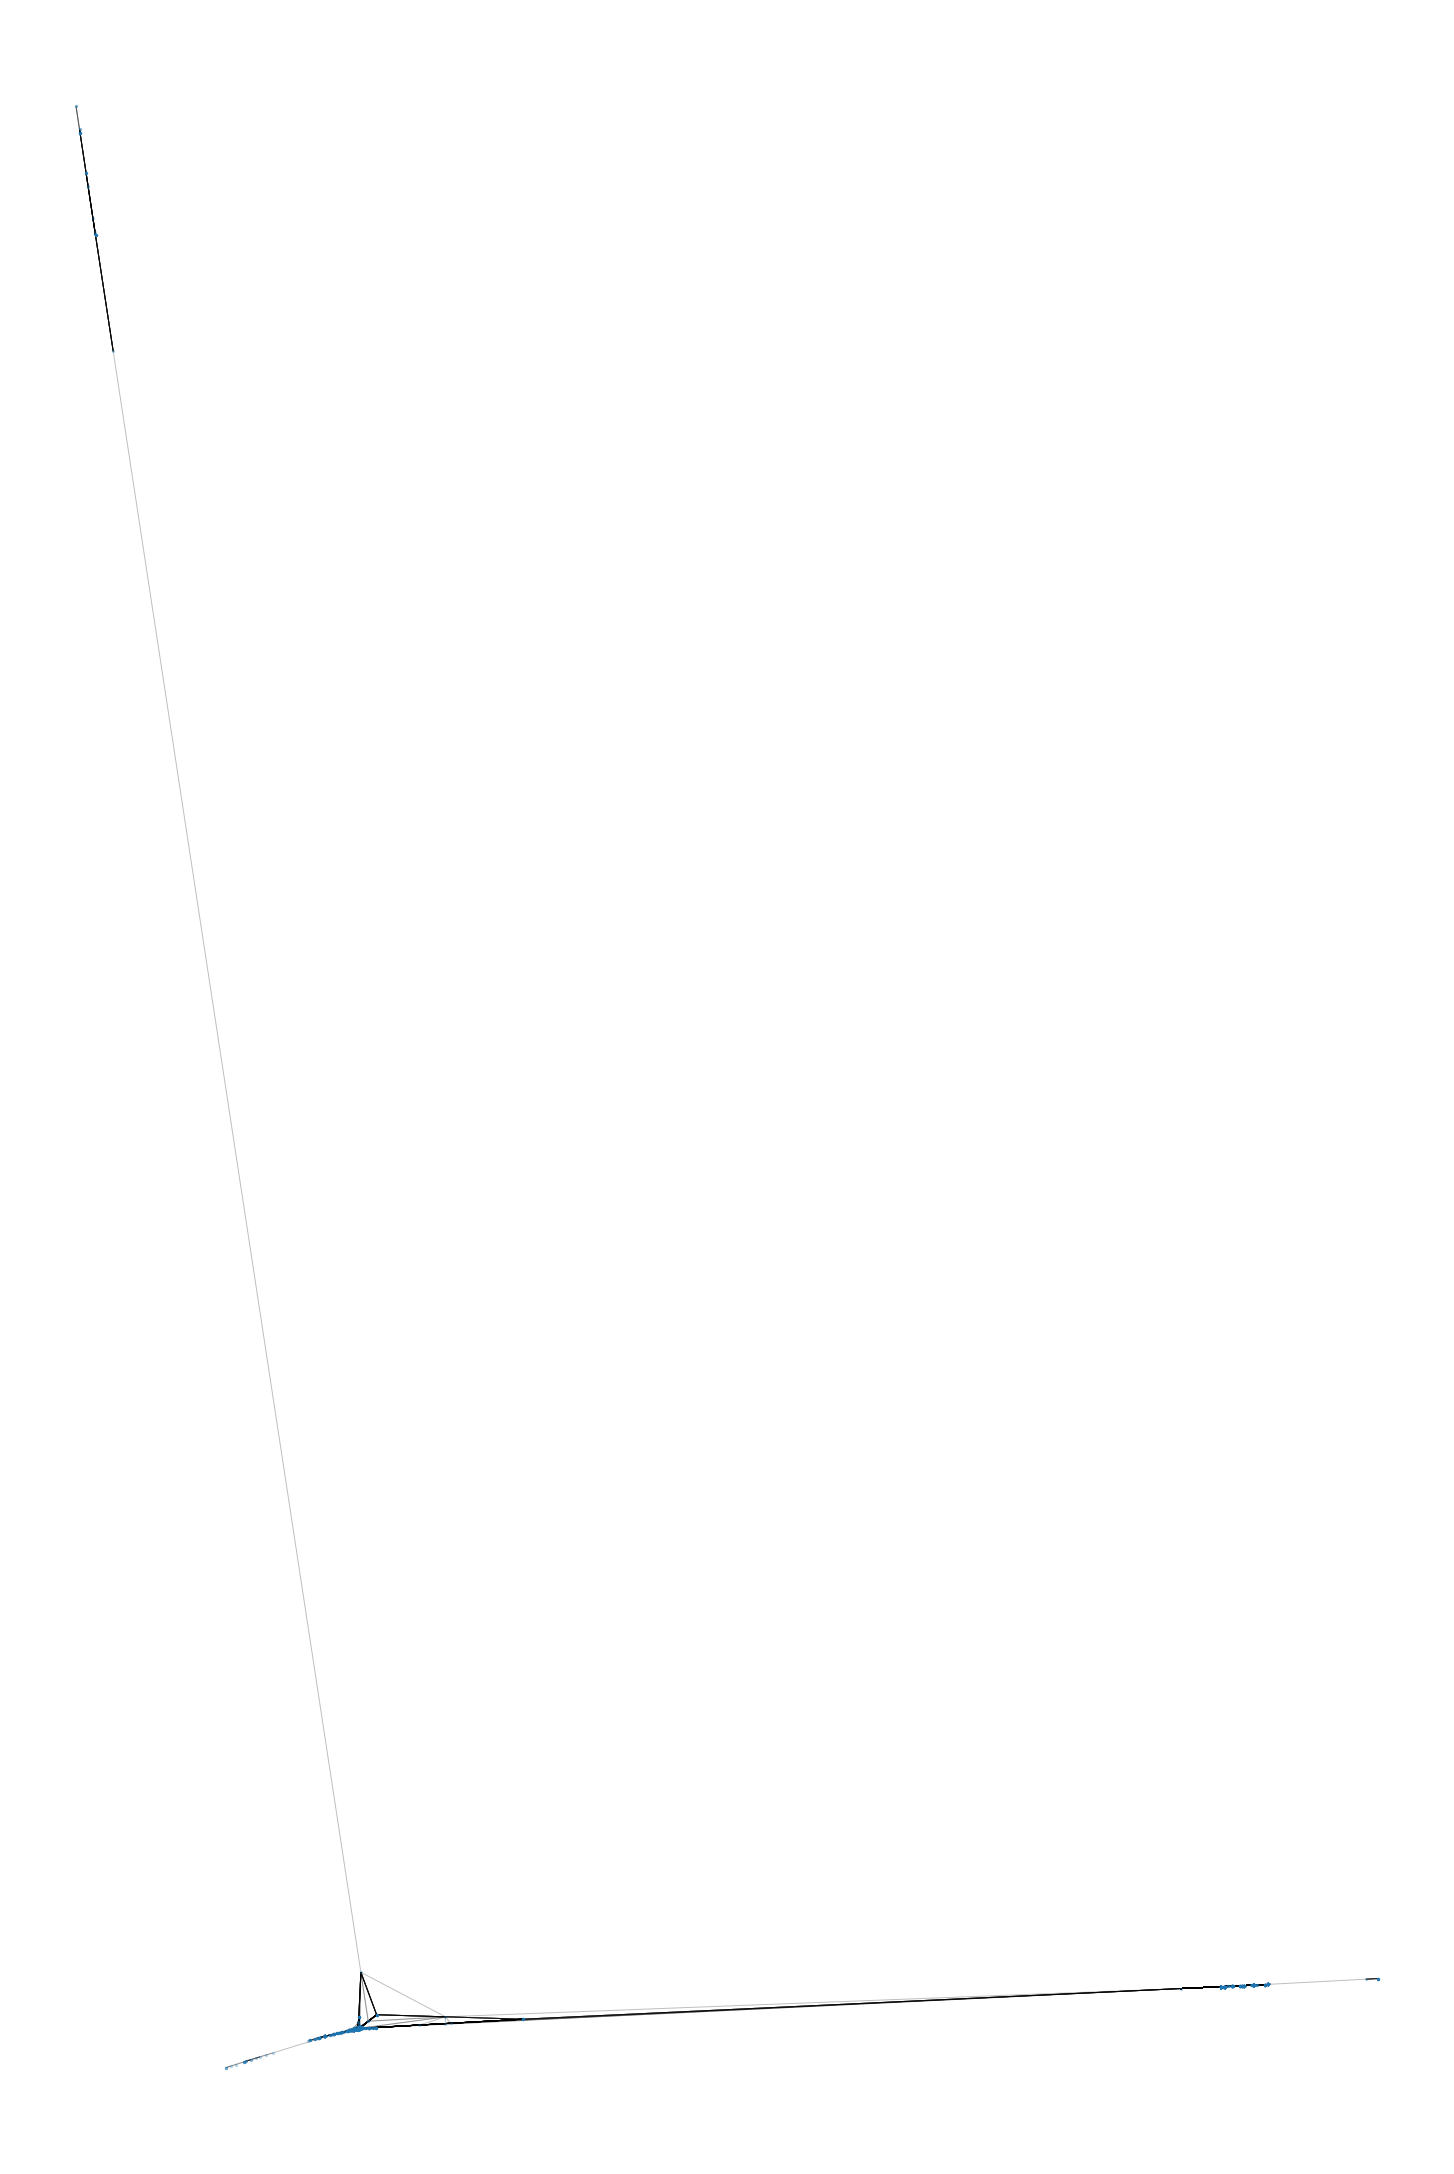

In [90]:
plt.figure(figsize=(20,30))
nx.draw_spectral(LC_part, alpha=0.25, node_size=5)

In [91]:
nx.degree_histogram(LC_part)

[0,
 68,
 29,
 35,
 29,
 52,
 39,
 15,
 32,
 76,
 37,
 70,
 55,
 66,
 107,
 134,
 144,
 142,
 304,
 301,
 517,
 158,
 126,
 77,
 131,
 71,
 89,
 74,
 22,
 104,
 61,
 33,
 34,
 16,
 44,
 22,
 25,
 25,
 6,
 10,
 10,
 20,
 7,
 4,
 7,
 85,
 5,
 8,
 6,
 5,
 5,
 2,
 5,
 3,
 1,
 0,
 26,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 90,
 2,
 2,
 64,
 1,
 0,
 1,
 0,
 1,
 0,
 53,
 3,
 5,
 8,
 3,
 1,
 1,
 85,
 5,
 1,
 3,
 1,
 3,
 3,
 1,
 33,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 136,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [79]:
c_components = nx.connected_components(G_comp)
c_largest_cc = max(c_components, key=len)

In [80]:
len(c_largest_cc)

1725

In [82]:
[len(c) for c in sorted(nx.connected_components(G_comp), key=len, reverse=True)][0:20]

[1725,
 425,
 270,
 270,
 227,
 227,
 219,
 185,
 182,
 181,
 173,
 165,
 163,
 142,
 128,
 115,
 113,
 113,
 101,
 81]

In [71]:
c_components

<generator object connected_components at 0x251034228>

In [59]:
score = { "Partners": [], "Companies": []} 

for key, G in graphs.items():
    print("processing", key)
    pa = nx.preferential_attachment(G)
    for x in pa:
        score[key].append(x[2])
    print("finished", key)

KeyboardInterrupt: 

In [98]:
import numpy as np

In [94]:
TEST = "Largest CC Partner"
score = { TEST: []} 


test_graphs = {TEST: LC_part}
for key, G in test_graphs.items():
    print("processing", key)
    pa = nx.preferential_attachment(G)
    for x in pa:
        score[key].append(x[2])
    print("finished", key)

processing Largest CC Partner
finished Largest CC Partner


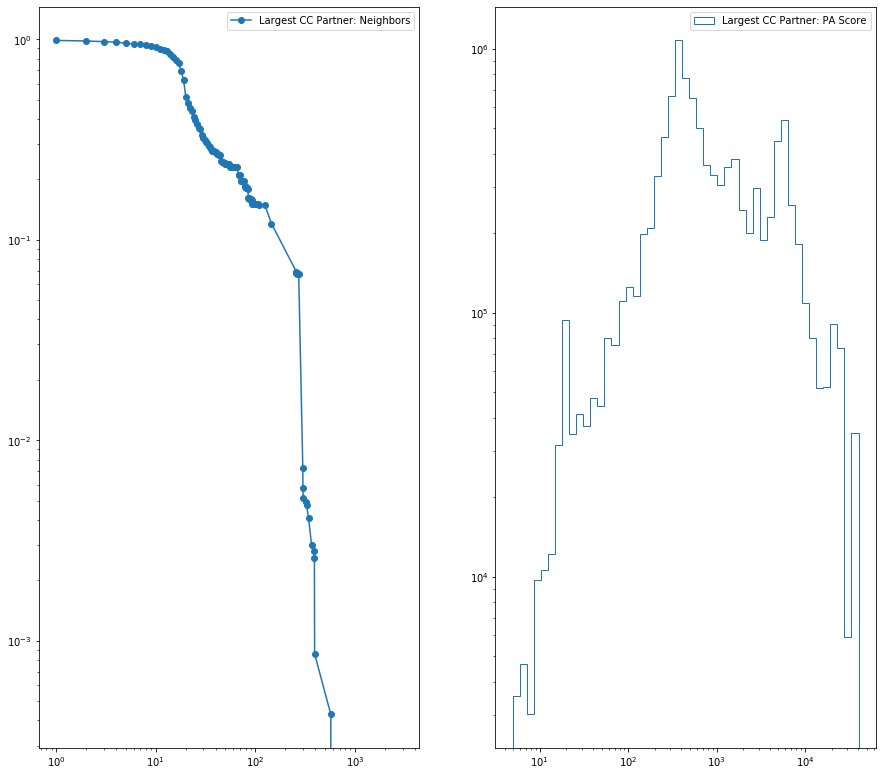

In [99]:
def length_of_list(list_of_numbers, number):
    x = [i for i in list_of_numbers if i > number]
    return len(x)

plt.figure(figsize=(15,30))

index = 0
for key, G in test_graphs.items():
    dictlist = []
    px = []
    for k, value in G.degree():
        dictlist.append(value)
    for z in sorted(set(dictlist)):
        px.append(length_of_list(dictlist, z)/len(dictlist))
    
    index += 1
    plt.subplot(2, 2, index)
    plt.loglog(sorted(set(dictlist)), px, marker='o')
    plt.legend([f'{key}: Neighbors'])
    index += 1
    plt.subplot(2, 2, index)
    plt.hist(score[key], bins=np.logspace(np.log(2),np.log(100.0), 50), histtype='step')
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    plt.legend([f'{key}: PA Score'])

plt.show()

In [ ]:
def length_of_list(list_of_numbers, number):
    x = [i for i in list_of_numbers if i > number]
    return len(x)

plt.figure(figsize=(15,30))

index = 0
for key, G in graphs.items():
    dictlist = []
    px = []
    for key, value in G.degree():
        dictlist.append(value)
    for z in sorted(set(dictlist)):
        px.append(length_of_list(dictlist, z)/len(dictlist))
    
    index += 1
    plt.subplot(2, 2, index)
    plt.loglog(sorted(set(dictlist)), px, marker='o')
    plt.legend([f'{key}: Neighbors'])
    index += 1
    plt.subplot(2, 2, index)
    plt.hist(score[key], bins=np.logspace(np.log(2),np.log(100.0), 50), histtype='step')
    plt.gca().set_xscale("log")
    plt.gca().set_yscale("log")
    plt.legend([f'{key}: PA Score'])

plt.show()

## Medidas de Centralidade

In [46]:
dg_cent = nx.degree_centrality(G_part)
sorted(dg_cent.items(), key=lambda x:x[1], reverse=True)[0:10]

TypeError: degree_centrality() got an unexpected keyword argument 'normalized'

In [48]:
d_hist = nx.degree_histogram(G_part)

In [49]:
len(d_hist)

2931

In [50]:
high_dg = [n for n in G_part.nodes if G_part.degree(n) > 300]

In [51]:
len(high_dg)

426

In [52]:
high_dg

['***373640**',
 '***245208**',
 '***590198**',
 '***288906**',
 '***627050**',
 '***908190**',
 '***175406**',
 '***757650**',
 '***218297**',
 '***775238**',
 '***451668**',
 '***159278**',
 '***250217**',
 '***878528**',
 '***979420**',
 '***079969**',
 '***053258**',
 '***044558**',
 '***976588**',
 '***767438**',
 '***932347**',
 '***281398**',
 '***912688**',
 '***311228**',
 '***288088**',
 '***222109**',
 '***120400**',
 '***375500**',
 '***227428**',
 '***063118**',
 '***022168**',
 '***079570**',
 '***161638**',
 '***180568**',
 '***282868**',
 '***671676**',
 '***071228**',
 '***011938**',
 '***731518**',
 '***328080**',
 '***390428**',
 '***997900**',
 '***862908**',
 '***434888**',
 '***086238**',
 '***470487**',
 '***634518**',
 '***916128**',
 '***249048**',
 '***549418**',
 '***480170**',
 '***687287**',
 '***898300**',
 '***763788**',
 '***930708**',
 '***001328**',
 '***383778**',
 '***056478**',
 '***637408**',
 '***508910**',
 '***824230**',
 '***231460**',
 '***414

In [53]:
len([n for n in G_part.nodes if G_part.degree(n) > 100])

2449

In [54]:
len(list(nx.isolates(G_part)))

54727

In [14]:
parts_dict = {
    "Empresas": companies,
    "CPFs sócios": part_people,
    "CNPJs sócios": part_companies,
    "Estrangeiros sócios": part_foreigners,
}

In [15]:
subgraphs = {}
for k, v in parts_dict.items():
    subgraphs[k] = G_cp.subgraph(v)

In [16]:
for k, v in subgraphs.items():
    print(k)
    print(nx.info(v))

Empresas
Name: 
Type: DiGraph
Number of nodes: 367327
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
CPFs sócios
Name: 
Type: DiGraph
Number of nodes: 401560
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
CNPJs sócios
Name: 
Type: DiGraph
Number of nodes: 6394
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Estrangeiros sócios
Name: 
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


In [17]:
print(G_cp.in_degree(part_foreigners[0]), G_cp.out_degree(part_foreigners[0]))

0 83


In [18]:
print(nx.info(G_cp.subgraph(part_people + part_foreigners)))

Name: 
Type: DiGraph
Number of nodes: 401561
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


In [27]:
partnerless = [n for n in part_companies if G_cp.in_degree(n) == 0]

In [28]:
len(part_companies)

0

In [11]:
df_test = df_partners[(df_partners.cnpj.isin(df_double_agent.cnpj_cpf_socio)) | 
                      (df_partners.cnpj_cpf_socio.isin(df_double_agent.cnpj_cpf_socio))]

In [12]:
df_test

,cnpj,cnpj_cpf_socio,tipo_socio
398592,78220000138,62984091000102,1
398595,78220000219,62984091000102,1
426547,111296000118,56012628000161,1
483554,198869000192,28034898000138,1
483555,198869000192,27647918000183,1
...,...,...,...
26140117,96792791000109,***030705**,2
26140118,96792791000109,***961465**,2
26140119,96792791000109,***698535**,2
26140120,96792791000109,***616525**,2


In [13]:
G = nx.from_pandas_edgelist(df_test, PARTNER_ID, CNPJ, create_using=nx.DiGraph)

In [14]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 4795
Number of edges: 4565
Average in degree:   0.9520
Average out degree:   0.9520


In [15]:
n1 = [n for n in G.nodes if (G.in_degree(n) == 0) and (G.out_degree(n) > 0)]
print(len(n1), n1)

2559 ['***678508**', '05409080000157', '***753855**', '***166671**', '***636485**', '***461900**', '***555627**', '***527527**', '***848737**', '***115457**', '***428467**', '***371600**', '***119700**', '***784140**', '***671368**', '***694148**', '10420528000173', '10376900000191', '10412143000164', '10392301000161', '10401506000166', '10373768000164', '10373749000138', '10398222000168', '10562011000119', '***980115**', '***741127**', '***906823**', '***770218**', '09599048000132', '***098590**', '***799210**', '***342540**', '***412280**', '***549730**', '***621830**', '***381080**', '***641158**', '***759458**', '***358827**', '***344797**', '29030860000150', '***573908**', '***583438**', '27986457000173', '***424111**', '***553671**', '04999011000188', '***364396**', '***956108**', '***516238**', '***516208**', '***586349**', '03450460000100', '***140768**', '***295408**', '***934456**', '***661196**', '***321187**', '***884387**', '***662027**', '***267627**', '***084890**', '***

In [23]:
df_test[df_test.cnpj_cpf_socio == '62984091000102']

,cnpj,cnpj_cpf_socio,tipo_socio
398592,78220000138,62984091000102,1
398595,78220000219,62984091000102,1
9594672,8679557000102,62984091000102,1
9594677,8679557000374,62984091000102,1
9594682,8679557000455,62984091000102,1
9594684,8679557000536,62984091000102,1
9594687,8679557000617,62984091000102,1
21714131,50005735000186,62984091000102,1
21714140,50005735000267,62984091000102,1


In [26]:
df_test[df_test.cnpj == 62984091000102]

,cnpj,cnpj_cpf_socio,tipo_socio
24216132,62984091000102,***905258**,2
24216133,62984091000102,***170922**,2
24216134,62984091000102,***803718**,2
24216135,62984091000102,***232687**,2
24216136,62984091000102,***005328**,2
24216137,62984091000102,***793518**,2
24216138,62984091000102,***261778**,2
24216139,62984091000102,***005368**,2
24216140,62984091000102,***946158**,2
24216141,62984091000102,***843628**,2


In [16]:
n2 = [n for n in G.nodes if (G.in_degree(n) > 0) and (G.out_degree(n) > 0)]
print(len(n2), n2)

718 ['62984091000102', '56012628000161', '28034898000138', '27647918000183', '10397499000176', '61793907000140', '20812223000160', '11374000000178', '15537729000179', '14011425000100', '26083507000140', '60704335000112', '60704418000101', '72314776000197', '23167140000154', '21183762000140', '10406065000195', '94175460000102', '34185306000181', '27741982000129', '26258611000128', '19213316000190', '38733648000140', '60267580000100', '89674782000158', '12919237000150', '30793017000104', '61186490000157', '54692710000159', '61259958000196', '84683556000110', '72105745000126', '58295213000178', '11705117000197', '27529578000196', '65709198000122', '10739240000166', '19209024000183', '15190745000138', '17843703000184', '14693005000151', '14475613000190', '14086522000162', '93005494000188', '92998343000105', '58783960000155', '10885441000171', '61451431000169', '48874598000174', '14793478000120', '48236400000127', '19166528000163', '44603447000120', '11014923000119', '29527413000100', '1028

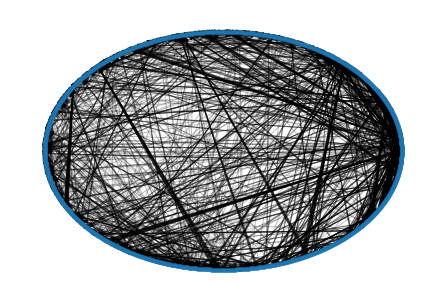

In [17]:
nx.draw_circular(G, alpha=0.25, node_size=10)

In [19]:
bipartite.is_bipartite(G)

False

In [44]:
G_cp = nx.read_gexf(COMPANIES_PARTNERS_GRAPH)

In [45]:
def has_attr(G, attribute, n):
    return True if attribute in G.nodes[n] else False

In [30]:
# af de "affiliation"
G_af = G_cp.copy()

In [34]:
df_partners[df_partners.cnpj_cpf_socio == '23107011000170']

,cnpj,cnpj_cpf_socio,tipo_socio
355076,410000132,23107011000170,1
355084,410000302,23107011000170,1
355088,410000485,23107011000170,1
355092,410000566,23107011000170,1
5577250,4830624000197,23107011000170,1
5577266,4830624000510,23107011000170,1
5577270,4830624000600,23107011000170,1
5577277,4830624000782,23107011000170,1
5577281,4830624000863,23107011000170,1
5577286,4830624001088,23107011000170,1


In [31]:
nodes_to_remove = []
for node in part_companies:
    predecessors = G_af.predecessors(node)
    successors = G_af.successors(node)
    new_edges = [(p,s) for p in predecessors for s in successors]
    if (not new_edges):
        print("Skiping", node, G_af.nodes[node][PARTNER_KIND], G_af.in_degree(node), G_af.out_degree(node))
        break
    nodes_to_remove.append(node)
    G_af.add_edges_from(new_edges)
G_af.remove_nodes_from(nodes_to_remove)

In [32]:
print(nx.info(G_af))

Name: 
Type: DiGraph
Number of nodes: 774564
Number of edges: 748578
Average in degree:   0.9665
Average out degree:   0.9665


In [33]:
bipartite.is_bipartite(G_af)

False

In [38]:
nodes_to_remove = []
for node in G_af.nodes:
    if PARTNER_KIND in G_af.nodes[node]:
        if G_af.nodes[node][PARTNER_KIND] == KIND_COMPANY:
            predecessors = G_af.predecessors(node)
            successors = G_af.successors(node)
            new_edges = [(p,s) for p in predecessors for s in successors]
            if (not new_edges):
                print("Skiping", node, G_af.nodes[node][PARTNER_KIND], G_af.in_degree(node), G_af.out_degree(node))
                break
            nodes_to_remove.append(node)
            G_af.add_edges_from(new_edges)
G_af.remove_nodes_from(nodes_to_remove)

Skiping 23107011000170 1 0 20


In [53]:
gros_partners = []
n_companies = []
for n in G_cp.nodes:
    outd = G_cp.out_degree(n)
    if(outd > 100):
        gros_partners.append(str(n))
        n_companies.append(outd)
        print("{} é sócio de {} CNPJs em Educação".format(n, outd))

***040477** é sócio de 166 CNPJs em Educação
***094998** é sócio de 104 CNPJs em Educação
***109868** é sócio de 329 CNPJs em Educação
***824308** é sócio de 373 CNPJs em Educação
***922936** é sócio de 114 CNPJs em Educação
***943106** é sócio de 150 CNPJs em Educação
***846408** é sócio de 163 CNPJs em Educação
***112605** é sócio de 161 CNPJs em Educação
***225868** é sócio de 677 CNPJs em Educação
***616878** é sócio de 684 CNPJs em Educação
***436968** é sócio de 680 CNPJs em Educação
***347826** é sócio de 111 CNPJs em Educação
***948133** é sócio de 122 CNPJs em Educação
***031488** é sócio de 268 CNPJs em Educação
***189546** é sócio de 150 CNPJs em Educação
***200037** é sócio de 147 CNPJs em Educação
04310392000146 é sócio de 183 CNPJs em Educação
***153291** é sócio de 567 CNPJs em Educação
38733648000140 é sócio de 290 CNPJs em Educação
***680003** é sócio de 128 CNPJs em Educação
***815748** é sócio de 261 CNPJs em Educação
***179838** é sócio de 313 CNPJs em Educação
***2

In [58]:
len(gros_partners)

73

In [55]:
df_partners[df_partners.cnpj_cpf_socio.isin(gros_partners)]

,cnpj,cnpj_cpf_socio,tipo_socio
382158,59864000189,***040477**,2
382160,59864000260,***040477**,2
426549,111296000118,***094998**,2
432113,118723000190,***109868**,2
432115,118723000190,***824308**,2
...,...,...,...
26110049,96318142001819,***225868**,2
26110050,96318142001908,***436968**,2
26110051,96318142001908,***616878**,2
26110052,96318142001908,***225868**,2


In [57]:
df_full_partners[df_full_partners.cnpj_cpf_socio == '***616878**']

,cnpj,tipo_socio,nome_socio,cnpj_cpf_socio,cod_qualificacao,perc_capital,data_entrada,cod_pais_ext,nome_pais_ext,cpf_repres,nome_repres,cod_qualif_repres
921080,709873000178,2,CARLOS ALBERTO BOLINA LAZAR,***616878**,5,0.0,20181120,249.0,ESTADOS UNIDOS,NaN,NaN,0
921085,709873000259,2,CARLOS ALBERTO BOLINA LAZAR,***616878**,5,0.0,20181120,23.0,ALEMANHA,NaN,NaN,0
921088,709873000330,2,CARLOS ALBERTO BOLINA LAZAR,***616878**,5,0.0,20181120,23.0,ALEMANHA,NaN,NaN,0
921095,709873000410,2,CARLOS ALBERTO BOLINA LAZAR,***616878**,5,0.0,20181120,275.0,FRANCA,NaN,NaN,0
1308350,1224108000120,2,CARLOS ALBERTO BOLINA LAZAR,***616878**,5,0.0,20180507,23.0,ALEMANHA,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25124989,80190796000202,2,CARLOS ALBERTO BOLINA LAZAR,***616878**,5,0.0,20181031,573.0,Países Baixos (Holanda),NaN,NaN,0
25410163,85288199000158,2,CARLOS ALBERTO BOLINA LAZAR,***616878**,5,0.0,20181107,249.0,ESTADOS UNIDOS,NaN,NaN,0
26110041,96318142001738,2,CARLOS ALBERTO BOLINA LAZAR,***616878**,5,0.0,20181023,275.0,FRANCA,NaN,NaN,0
26110048,96318142001819,2,CARLOS ALBERTO BOLINA LAZAR,***616878**,5,0.0,20181023,249.0,ESTADOS UNIDOS,NaN,NaN,0


In [103]:
G_cp = nx.read_gexf(COMPANIES_PARTNERS_GRAPH)

## Passos de Interesse

1. Remover empresas que só têm 1 sócio e não são sócias de ninguém
2. Analisar métricas do Grafo:



3. Plotar Grafo


In [104]:
G_affiliation['410000132']

AtlasView({})

In [105]:
df_partners[df_partners.cnpj == 410000132]

,cnpj,cnpj_cpf_socio,tipo_socio
355076,410000132,23107011000170,1
355077,410000132,***868378**,2
355078,410000132,***635085**,2
355079,410000132,09584156000131,1


In [107]:
for node in G_affiliation.nodes:
    print(node, type(node))
    break

***439608** <class 'str'>


In [109]:
print(nx.info(G_affiliation))

Name: 
Type: DiGraph
Number of nodes: 774564
Number of edges: 748578
Average in degree:   0.9665
Average out degree:   0.9665


In [77]:
print(nx.info(G_affiliation))

Name: 
Type: DiGraph
Number of nodes: 768888
Number of edges: 734384
Average in degree:   0.9551
Average out degree:   0.9551


In [25]:
from networkx.algorithms import bipartite

In [116]:
foreigners = [n for n in G_affiliation.nodes if (
    (PARTNER_KIND in G_affiliation[n]) and (G_affiliation[n][PARTNER_KIND] == KIND_FOREIGNER)
)]

In [117]:
print(foreigners)

[]


In [119]:
people = [n for n in G_affiliation.nodes if G_affiliation.out_degree(n) > 0]
companies = [n for n in G_affiliation.nodes if G_affiliation.out_degree(n) == 0]

In [120]:
G_people = G_affiliation.subgraph(people)
G_companies = G_affiliation.subgraph(companies)

In [121]:
print(nx.info(G_people))
print(nx.info(G_companies))

Name: 
Type: DiGraph
Number of nodes: 407955
Number of edges: 2932
Average in degree:   0.0072
Average out degree:   0.0072
Name: 
Type: DiGraph
Number of nodes: 366609
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


In [26]:
bipartite.is_bipartite(G_cp)

True

In [113]:
for node in G_affiliation:
    if (PARTNER_KIND in G_affiliation[node]) and G_affiliation[node][PARTNER_KIND] == KIND_PERSON:
        dg = G_affiliation.in_degree(node)
        if dg > 0:
            print(G_affiliation[node], dg)

In [115]:
for node in G_affiliation:
    if (PARTNER_KIND in G_affiliation[node]) and G_affiliation[node][PARTNER_KIND] == KIND_COMPANY:
        dg = G_affiliation.out_degree(node)
        print(G_affiliation[node], dg)

In [111]:
isolated_nodes = list(nx.isolates(G_affiliation))
len(isolated_nodes)

0

In [ ]:
bipartite.

In [83]:
isolated_nodes

[2726846000139,
 2736003000113,
 3486973000170,
 4061780000130,
 8381531000183,
 25113217000139,
 35813906000100,
 35813906000533,
 52629912000120,
 58425356000157,
 75001594000588,
 90802067000132,
 90802067000213]

In [ ]:
# TODO: Tratar dados de estrangeiros

In [ ]:
# In [230]: g = nx.DiGraph()

# In [231]: g.add_edges_from([(1,2),(2,3)])

# In [232]: g.edges()
# Out[232]: [(1, 2), (2, 3)]

# In [233]: predecessors = g.predecessors(2)

# In [234]: successors = g.successors(2)

# In [235]: new_edges = [(p,s) for p in predecessors for s in successors]

# In [236]: new_edges
# Out[236]: [(1, 3)]

# In [237]: g.remove_node(2)

# In [238]: g.add_edges_from(new_edges)

# In [239]: g.nodes()
# Out[239]: [1, 3]

# In [240]: g.edges()
# Out[240]: [(1, 3)]

In [ ]:
df_full_partners[df_full_partners.cnpj_cpf_socio == '']

networkx.classes.reportviews.DiDegreeView

In [17]:
dhist = nx.degree_histogram(G_cp)
print(len(dhist))
dhist

685


[0,
 366826,
 283025,
 66949,
 27512,
 12204,
 7127,
 3882,
 1780,
 1284,
 1072,
 604,
 525,
 387,
 295,
 257,
 174,
 143,
 108,
 106,
 111,
 91,
 61,
 68,
 40,
 48,
 35,
 34,
 27,
 25,
 24,
 34,
 23,
 18,
 16,
 9,
 12,
 7,
 11,
 17,
 15,
 8,
 11,
 8,
 8,
 6,
 5,
 2,
 4,
 3,
 1,
 7,
 17,
 6,
 2,
 3,
 9,
 7,
 2,
 6,
 4,
 3,
 4,
 4,
 2,
 1,
 3,
 0,
 5,
 7,
 2,
 2,
 4,
 0,
 0,
 2,
 1,
 1,
 1,
 4,
 1,
 4,
 1,
 2,
 0,
 0,
 3,
 1,
 0,
 3,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 4,
 2,
 0,
 1,
 1,
 0,
 1,
 0,
 11,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 4,
 1,
 1,
 1,
 1,
 10,
 3,
 0,
 0,
 1,
 1,
 1,
 1,
 3,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 

In [ ]:
nx.draw(G_cp)

In [38]:
in_degrees = [G_cp.in_degree(n) for n in G_cp.nodes()]

In [41]:
from collections import Counter

In [43]:
counts = Counter(in_degrees)
in_hist = [counts.get(i, 0) for i in range(max(counts) + 1)]

In [44]:
len(in_hist)

343

<BarContainer object of 343 artists>

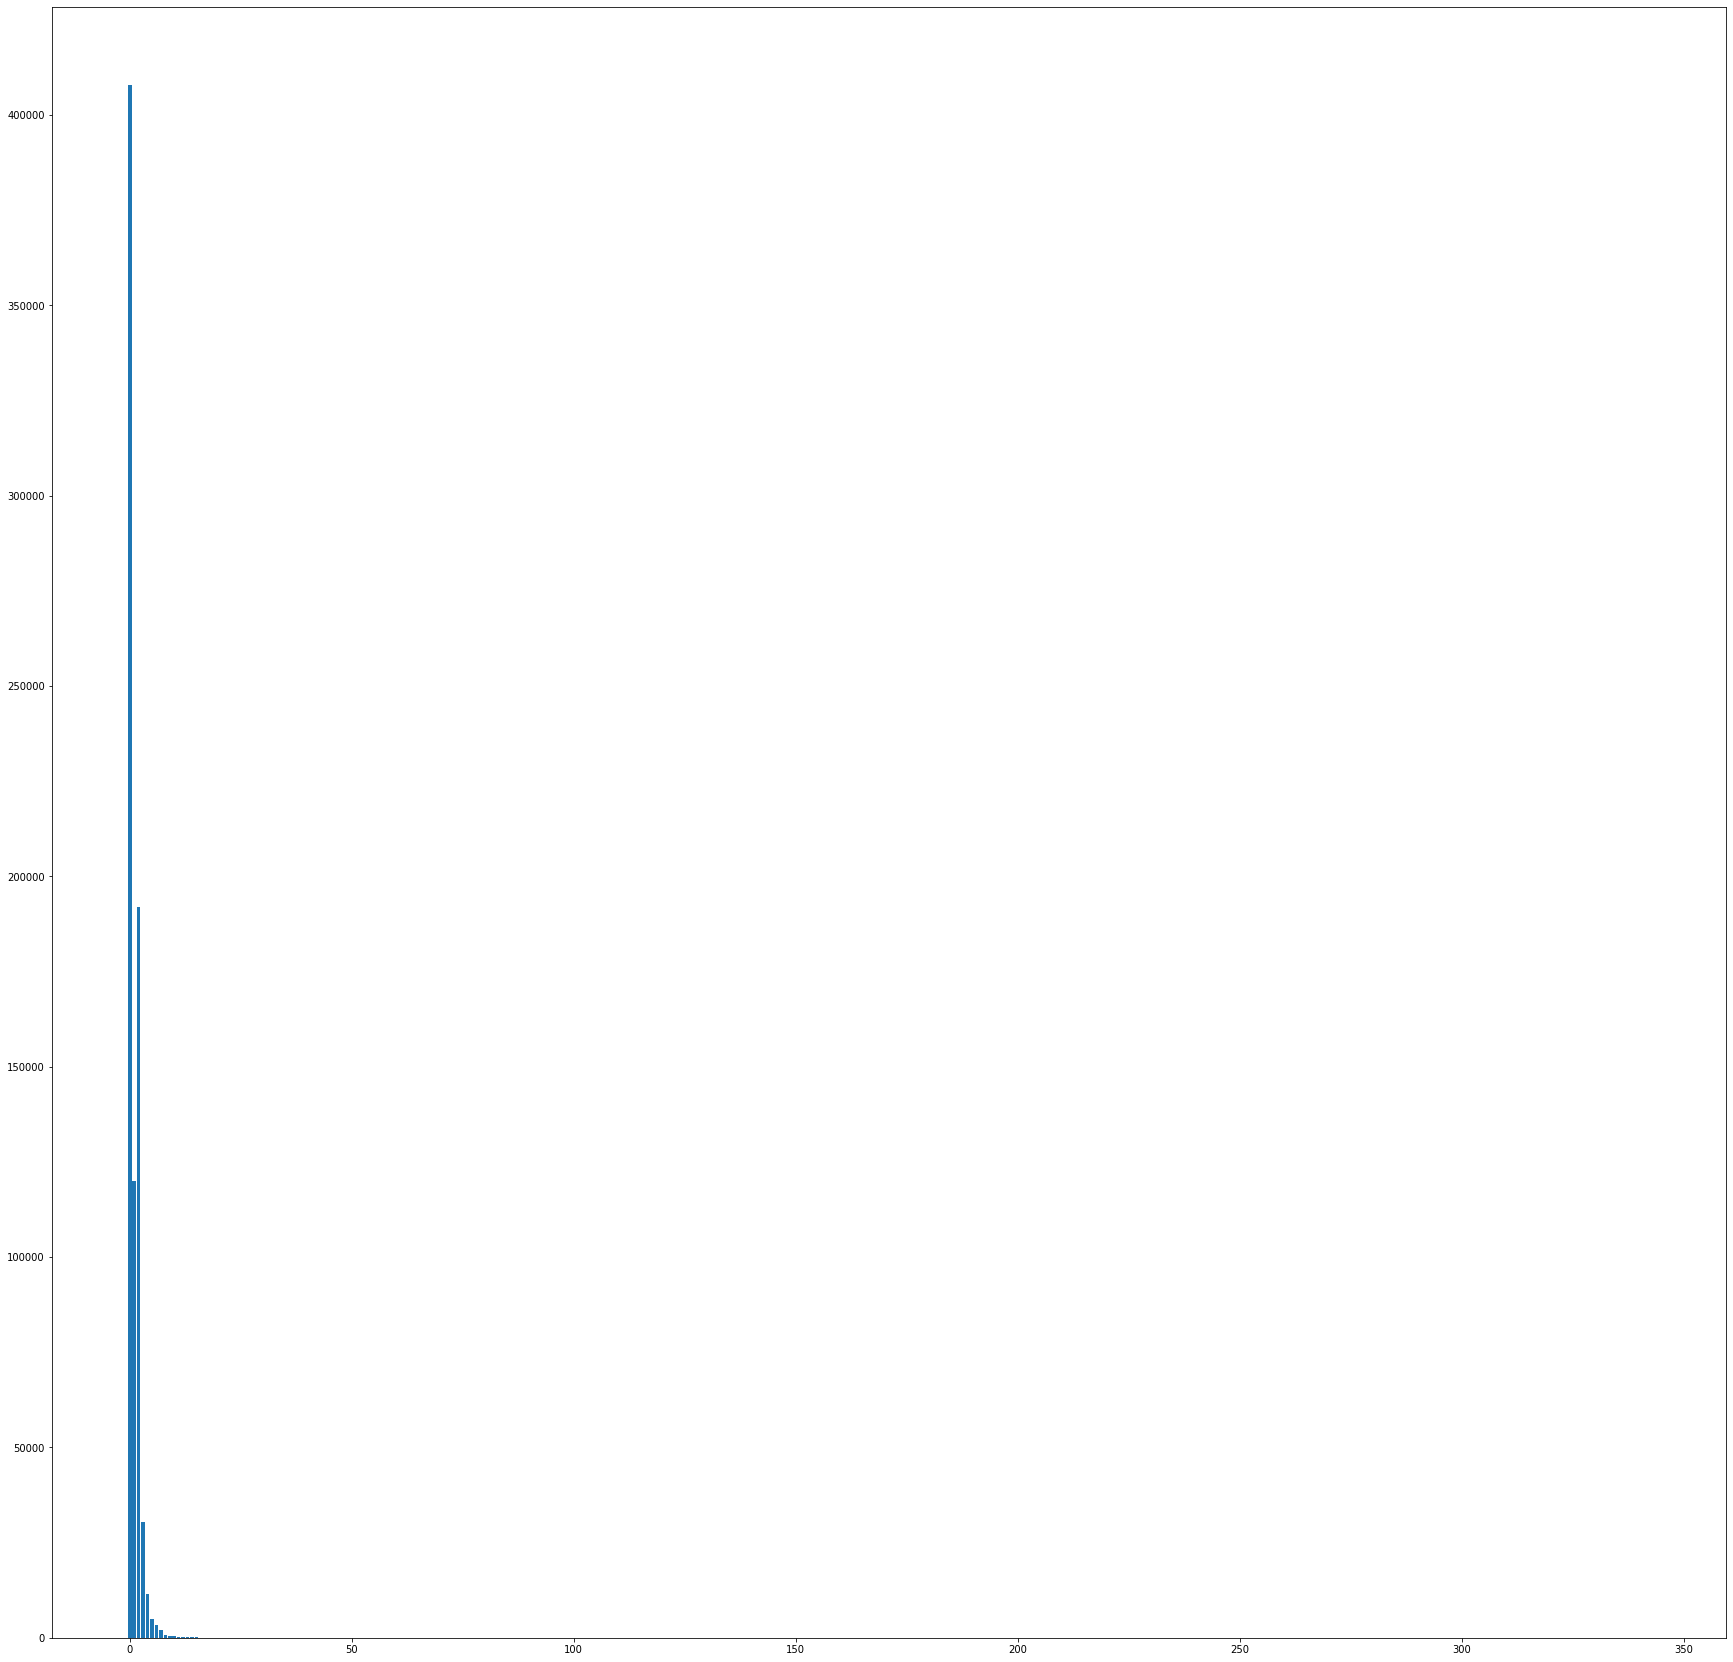

In [51]:
plt.figure(figsize=(30, 30))
plt.bar([x for x in range(len(in_hist))], in_hist)

In [45]:
out_degrees = [G_cp.out_degree(n) for n in G_cp.nodes()]
counts = Counter(out_degrees)
out_hist = [counts.get(i, 0) for i in range(max(counts) + 1)]

In [46]:
len(out_hist)

685

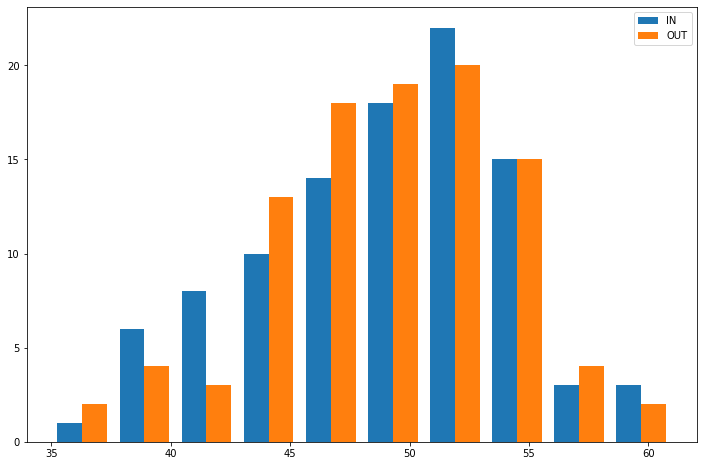

In [34]:
def plot_degree_dist(G):
    plt.figure(figsize=(12,8))
    if not G.is_directed:
        degrees = [G.degree(n) for n in G.nodes()]
        plt.hist(degrees)
        plt.show()
    else:
        in_degrees = [G.in_degree(n) for n in G.nodes()]
        out_degrees = [G.out_degree(n) for n in G.nodes()]        
        plt.hist([in_degrees, out_degrees], label=['IN', 'OUT'])
        plt.legend(loc='upper right')
        plt.show()

def plot_in_degree_dist(G):
    degrees = [G.in_degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
    
def plot_out_degree_dist(G):
    degrees = [G.in_degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

In [71]:
df_full_partners[df_full_partners.tipo_socio == 3].cod_qualif_repres.value_counts()

17    110
0       1
Name: cod_qualif_repres, dtype: int64

In [56]:
out_degrees = [(n, G_cp.out_degree(n)) for n in G_cp.nodes]

In [57]:
len(out_degrees)

774564

In [58]:
df = pd.DataFrame(out_degrees, columns=[CNPJ_CPF_SOCIO, 'socio_de'])

In [59]:
df_partnership = df.merge(
    df_partners[[CNPJ_CPF_SOCIO, NOME_SOCIO]].groupby(CNPJ_CPF_SOCIO).max(), how='left', on=CNPJ_CPF_SOCIO
)

In [60]:
df_partnership.sort_values(by=['socio_de', 'nome_socio'], ascending=False).head(20)

,cnpj_cpf_socio,socio_de,nome_socio
12802,***616878**,684,EDSON MEDEIROS
12803,***436968**,680,SONIA MARCIA BEOLCHI FERES
12801,***225868**,677,SANDRA GARCIA RIBEIRO GONCALVES
24691,***153291**,567,RODRIGO CALVO GALINDO
1774,***824308**,373,THALES JOSE DE LIMA PEDROSA
1772,***109868**,329,JORGE BRIHY
36589,***179838**,313,FERNANDO DI GENIO BARBOSA
24692,38733648000140,290,EDITORA E DISTRIBUIDORA EDUCACIONAL S/A
22837,***031488**,268,RODRIGO DOS SANTOS FAGUNDES
36588,***815748**,261,RICARDO SALVATO SILVEIRA CINTRA


In [ ]:
12791	***616878**	682	EDSON MEDEIROS
12792	***436968**	681	SONIA MARCIA BEOLCHI FERES
12790	***225868**	680	SANDRA GARCIA RIBEIRO GONCALVES
24669	***153291**	575	RODRIGO CALVO GALINDO
1772	***824308**	372	THALES JOSE DE LIMA PEDROSA
1770	***109868**	329	JORGE BRIHY
36560	***179838**	310	FERNANDO DI GENIO BARBOSA
22816	***031488**	268	RODRIGO DOS SANTOS FAGUNDES
36559	***815748**	261	RICARDO SALVATO SILVEIRA CINTRA
83245	***680604**	226	JOAO ALBERICO PORTO DE AGUIAR
83247	***249275**	226	ADRIANO LISBOA DE AZEVEDO
457000	***281646**	211	NATALINO LISBOA FILHO
456999	***340886**	211	MATHEUS DE CASTRO LISBOA
24667	04310392000146	183	ANHANGUERA EDUCACIONAL PARTICIPACOES S/A
352441	***601807**	182	VANESSA BONIFACIO TAVARES
625506	***893960**	182	KARINA DE SOUZA RODRIGUES
587907	***452885**	182	JOSE LIMA SANTANA
368714	***685787**	182	ERNANI SOARES MAIA
722714	***092764**	181	ROGERIO AUTO TEOFILO
722715	***493721**	181	EDINALVO DANTAS

In [69]:
df_partners[df_partners.cnpj_cpf_socio == '***616878**']

,cnpj,razao_social,matriz_filial,capital_social,cnpj_cpf_socio,nome_socio,tipo_socio
9647,709873000178,ACEL ADMINISTRACAO DE CURSOS EDUCACIONAIS LTDA,1,7.709164e+09,***616878**,CARLOS ALBERTO BOLINA LAZAR,2
9652,709873000259,ACEL ADMINISTRACAO DE CURSOS EDUCACIONAIS LTDA,2,0.000000e+00,***616878**,CARLOS ALBERTO BOLINA LAZAR,2
9655,709873000330,ACEL ADMINISTRACAO DE CURSOS EDUCACIONAIS LTDA,2,0.000000e+00,***616878**,CARLOS ALBERTO BOLINA LAZAR,2
9662,709873000410,ACEL ADMINISTRACAO DE CURSOS EDUCACIONAIS LTDA,2,0.000000e+00,***616878**,CARLOS ALBERTO BOLINA LAZAR,2
18974,1224108000120,PSES SERVICOS EDUCACIONAIS LTDA.,1,2.100000e+08,***616878**,CARLOS ALBERTO BOLINA LAZAR,2
...,...,...,...,...,...,...,...
737363,80190796000202,MAXIPRINT EDITORA LTDA,2,0.000000e+00,***616878**,CARLOS ALBERTO BOLINA LAZAR,2
740600,85288199000158,ESCOLA RIACHO DOCE LTDA,1,1.716900e+08,***616878**,CARLOS ALBERTO BOLINA LAZAR,2
746962,96318142001738,LIVRARIA LIVRO FACIL LTDA,2,0.000000e+00,***616878**,CARLOS ALBERTO BOLINA LAZAR,2
746969,96318142001819,LIVRARIA LIVRO FACIL LTDA,2,0.000000e+00,***616878**,CARLOS ALBERTO BOLINA LAZAR,2


In [70]:
G_af.out_degree('***616878**')

682

In [71]:
G_cp.out_degree('***616878**')

684

In [76]:
df_partners[df_partners.cnpj == df_partners.cnpj_cpf_socio]

,cnpj,razao_social,matriz_filial,capital_social,cnpj_cpf_socio,nome_socio,tipo_socio
247748,10311486000132,VENCER - INSTITUTO DE DESENVOLVIMENTO HUMANO LTDA,1,1.000000e+06,10311486000132,VENCER - INSTITUTO DE DESENVOLVIMENTO HUMANO LTDA,1
251261,10420532000131,NUCLEO DE CURSO E TREINAMENTO PROFISSIONAL LOB...,1,1.000000e+05,10420532000131,NUCLEO DE CURSO E TREINAMENTO PROFISSIONAL LOB...,1
251351,10422585000191,EPPA - EMPRESA ESCOLA PROFISSIONALIZANTE PAULI...,1,1.000000e+06,10422585000191,EPPA - EMPRESA ESCOLA PROFISSIONALIZANTE PAULI...,1
251433,10425769000105,"PAZOS, OTTONI & CIA LTDA",1,1.000000e+06,10425769000105,"PAZOS, OTTONI & CIA LTDA",1
252370,10455423000150,YOU BETTER BUSINESS CONSULTORIA EDUCACIONAL LTDA,1,5.000000e+05,10455423000150,YOU BETTER BUSINESS CONSULTORIA EDUCACIONAL LTDA,1
...,...,...,...,...,...,...,...
744233,91388017000113,CONSULTESUL CONSULTORYA ADMINISTRATIVA LTDA,1,2.000000e+06,91388017000113,CONSULTESUL CONSULTORYA ADMINISTRATIVA LTDA,1
744539,92006733000151,CULTURAL COMERCIO E ENSINO DE LINGUAS LTDA,1,0.000000e+00,92006733000151,CULTURAL COMERCIO E ENSINO DE LINGUAS LTDA,1
745747,93315190000117,ELISEU KOPP & CIA LTDA,1,1.120000e+10,93315190000117,ELISEU KOPP & CIA LTDA,1
745882,93508141000109,CLINICA MEDICA DR NILO FRANTZ LTDA,1,1.000000e+08,93508141000109,CLINICA MEDICA DR NILO FRANTZ LTDA,1


In [77]:
nx.number_of_selfloops(G_cp)

0

In [79]:
G_cp.add_edge('10311486000132', '10311486000132')
nx.number_of_selfloops(G_cp)

1

In [81]:
list(nx.selfloop_edges(G_cp))

[('10311486000132', '10311486000132')]

In [33]:
df_test = df_partners.drop(df_partners[df_partners.cnpj == df_partners.cnpj_cpf_socio].index)

In [34]:
len(df_test.cnpj_cpf_socio.unique())

407829

In [35]:
df_test

,cnpj,razao_social,matriz_filial,capital_social,cnpj_cpf_socio,nome_socio,tipo_socio
0,14000105,CLUBE DE MAES DA CASA VERDE ALTA E ADJACENCIAS,1,0.0,***439608**,ANTONIO OLIVEIRA DA SILVA,2
1,14000296,CLUBE DE MAES DA CASA VERDE ALTA E ADJACENCIAS,2,0.0,***439608**,ANTONIO OLIVEIRA DA SILVA,2
2,14000377,CLUBE DE MAES DA CASA VERDE ALTA E ADJACENCIAS,2,0.0,***439608**,ANTONIO OLIVEIRA DA SILVA,2
3,28000129,TARGET ENGENHARIA E CONSULTORIA LTDA.,1,45000000.0,***135348**,CRISTIANO FERRAZ DE PAIVA,2
4,28000129,TARGET ENGENHARIA E CONSULTORIA LTDA.,1,45000000.0,***695748**,MAURICIO FERRAZ DE PAIVA,2
...,...,...,...,...,...,...,...
748623,98675093000159,CENTRO COMUNITARIO VERANENSE DE EDUCACAO E ASS...,1,0.0,***606100**,ARTHUR GRANDO,2
748624,98759046000193,SOCIEDADE ESPIRITA SIMAO PEDRO,1,0.0,***307540**,LAUDIO ALBERTO BORBA,2
748625,98760572000173,ASSISTENCIA SOCIAL SANTA ISABEL,1,0.0,***665020**,VALDIR ANTONIO FORMENTINI,2
748626,98760572000254,ASSISTENCIA SOCIAL SANTA ISABEL,2,0.0,***665020**,VALDIR ANTONIO FORMENTINI,2


In [45]:
df_partners[df_partners.nome_socio == 'EDSON MEDEIROS']

,cnpj,razao_social,matriz_filial,capital_social,cnpj_cpf_socio,nome_socio,tipo_socio
607748,30311789000162,ATITUDE TREINAMENTO E CONSULTORIA EIRELI,1,10000000.0,***616878**,EDSON MEDEIROS,2


In [114]:
df_full_partners[df_full_partners.cnpj == '04310392000146']

,cnpj,tipo_socio,nome_socio,cnpj_cpf_socio,cod_qualificacao,perc_capital,data_entrada,cod_pais_ext,nome_pais_ext,cpf_repres,nome_repres,cod_qualif_repres,id_socio
